<h1><center>Régression linéaire simple</center></h1>

<h4>À propos de ce notebook</h4>
Dans ce cahier, nous apprenons à utiliser scikit-learn pour implémenter une régression linéaire simple. Nous téléchargeons un ensemble de données lié à la consommation de carburant et aux émissions de dioxyde de carbone des voitures. Ensuite, nous divisons nos données en ensembles d'entraînement et de test, créons un modèle à l'aide d'un ensemble d'entraînement, évaluons votre modèle à l'aide d'un ensemble de test et enfin, utilisons le modèle pour prédire une valeur inconnue.

<h1>Table des matières</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Compréhension des données</a></li>
        <li><a href="#reading_data">Lecture des données in</a></li>
        <li><a href="#data_exploration">Exploration des données</a></li>
        <li><a href="#simple_regression">Modèle de régression simple</a></li>
    </ol>
</div>
<br>
<hr>

### Importation des packages nécessaires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Téléchargement des données
Pour télécharger les données, nous utiliserons! Wget pour les télécharger à partir d'IBM Object Storage.

In [3]:
!curl -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv > FuelConsumptionCo2.csv

curl: Remote file name has no length!
curl: try 'curl --help' or 'curl --manual' for more information
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0  44530      0  0:00:01  0:00:01 --:--:-- 44530


__Le saviez-vous?__ En ce qui concerne le Machine Learning, vous travaillerez probablement avec de grands ensembles de données. En tant qu'entreprise, où pouvez-vous héberger vos données? IBM offre une opportunité unique aux entreprises, avec 10 To d'IBM Cloud Object Storage: [Inscrivez-vous maintenant gratuitement] (http://cocl.us/ML0101EN-IBM-Offer-CC)

<h2 id="understanding_data">Comprendre le Data</h2>

### `FuelConsumption.csv`:
Nous avons téléchargé un ensemble de données sur la consommation de carburant, **`FuelConsumption.csv`**, qui contient les cotes de consommation de carburant propres au modèle et les émissions de dioxyde de carbone estimées pour les véhicules légers neufs vendus au détail au Canada. [Source de l'ensemble de données] (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** par ex. 2014
- **FAIRE** par ex. Acura
- **MODÈLE** par ex. ILX
- **CLASSE DE VÉHICULE** par ex. SUV
- **TAILLE MOTEUR** par ex. 4.7
- **CYLINDRES** par exemple 6
- **TRANSMISSION** par ex. A6
- **CONSOMMATION DE CARBURANT EN VILLE (L / 100 km)** par ex. 9,9
- **CONSOMMATION DE CARBURANT sur autoroute (L / 100 km)** par ex. 8,9
- **PEIGNE DE CONSOMMATION DE CARBURANT (L / 100 km)** par ex. 9.2
- **ÉMISSIONS DE CO2 (g / km)** par ex. 182 -> faible -> 0

<h2 id="reading_data">Lecture des données </h2>

In [5]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="data_exploration">Data Exploration</h2>
Commençons par une exploration descriptive de nos données.

In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Permet de sélectionner certaines fonctionnalités pour en explorer davantage.

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


nous pouvons tracer chacune de ces caractéristiques:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

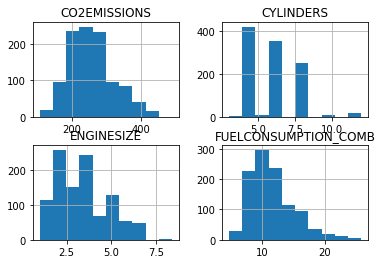

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Maintenant, traçons chacune de ces caractéristiques par rapport à l'émission, pour voir à quel point leur relation est linéaire:

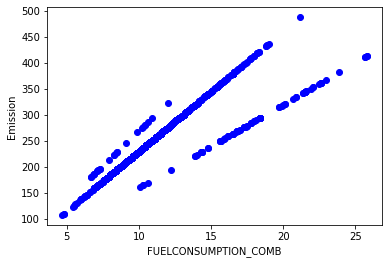

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

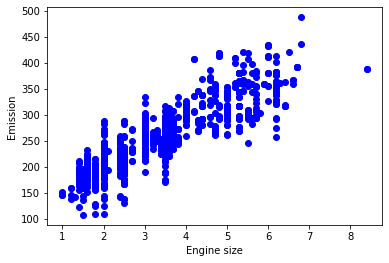

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Entraine toi
tracer __CYLINDRE__ en fonction de l’émission, pour voir à quel point leur relation est linéaire:

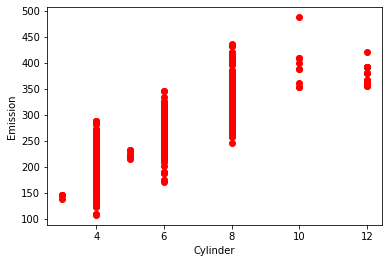

In [11]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,color ='red')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

Double-cliquez __ici__ pour la solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Création d'un ensemble de données de train et de test
Train / Test Split implique la division de l'ensemble de données en ensembles d'apprentissage et de test respectivement, qui s'excluent mutuellement. Après quoi, vous vous entraînez avec l'ensemble d'entraînement et testez avec l'ensemble de test.
Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour entraîner les données. C'est plus réaliste pour les problèmes du monde réel.

Cela signifie que nous connaissons le résultat de chaque point de données dans cet ensemble de données, ce qui en fait un excellent test! Et comme ces données n'ont pas été utilisées pour entraîner le modèle, le modèle n'a aucune connaissance du résultat de ces points de données. Donc, en substance, il s'agit vraiment d'un test hors échantillon.

Permet de diviser notre ensemble de données en ensembles de train et de test, 80% de l'ensemble des données pour la formation et les 20% pour les tests. Nous créons un masque pour sélectionner des lignes aléatoires en utilisant la fonction __np.random.rand ()__:

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Modèle de régression simple</h2>
La régression linéaire ajuste un modèle linéaire avec des coefficients $\theta = (\theta_1, ..., \theta_n)$ pour minimiser la «somme résiduelle des carrés» entre le x indépendant dans l'ensemble de données et le y dépendant par l'approximation linéaire.

#### Distribution des données du train

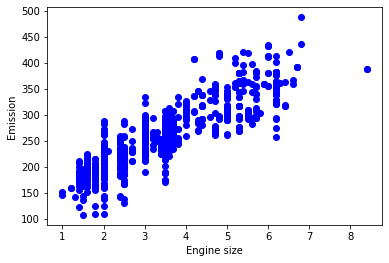

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### La modélisation
Utilisation du package sklearn pour modéliser les données.

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.78181081]]
Intercept:  [126.15602003]


Comme mentionné précédemment, __Coefficient__ et __Intercept__ dans la régression linéaire simple, sont les paramètres de la droite d'ajustement.
Étant donné qu'il s'agit d'une simple régression linéaire, avec seulement 2 paramètres, et sachant que les paramètres sont l'ordonnée à l'origine et la pente de la droite, sklearn peut les estimer directement à partir de nos données.
Notez que toutes les données doivent être disponibles pour parcourir et calculer les paramètres.

#### Tracer les sorties

nous pouvons tracer la ligne d'ajustement sur les données:

Text(0, 0.5, 'Emission')

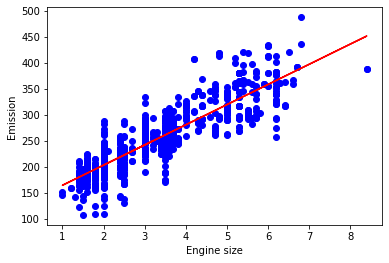

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Évaluation
nous comparons les valeurs réelles et les valeurs prévues pour calculer la précision d'un modèle de régression. Les paramètres d'évaluation jouent un rôle clé dans le développement d'un modèle, car ils fournissent des informations sur les domaines qui nécessitent des améliorations.

Il existe différentes métriques d'évaluation de modèle, permet d'utiliser MSE ici pour calculer la précision de notre modèle en fonction de l'ensemble de test:
<ul>
    <li> Erreur absolue moyenne: C'est la moyenne de la valeur absolue des erreurs. C'est la mesure la plus simple à comprendre, car il s'agit simplement d'une erreur moyenne.</li>
    <li> Erreur quadratique moyenne (MSE): L'erreur quadratique moyenne (MSE) est la moyenne de l'erreur quadratique. Il est plus populaire que l'erreur absolue moyenne, car l'accent est davantage mis sur les erreurs importantes. Cela est dû au fait que le terme quadratique augmente de façon exponentielle les erreurs plus importantes par rapport aux erreurs plus petites.</li>
    <li> Erreur quadratique moyenne racine (RMSE): il s'agit de la racine carrée de l'erreur quadratique moyenne. </li>
    <li> R-squared n'est pas une erreur, mais est une métrique populaire pour la précision de votre modèle. Il représente la proximité des données avec la droite de régression ajustée. Plus le R est élevé, plus le modèle s'adapte à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement pire) .</li>
</ul>

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.22
Residual sum of squares (MSE): 931.19
R2-score: 0.68
